# `Obesity based on eating habits and physical conditions`

# `Attributes related with eating habits are:`
* Frequent consumption of high caloric food (FAVC),
* Usually eat vegetables in your meals ( FCVC ),
* Number of main meals (NCP),
* Consumption of food between meals (CAEC),
* Consumption of water daily (CH20),
* Consumption of alcohol (CALC).

# `Attributes related with the physical condition are:`
* Calories consumption monitoring (SCC),
* Physical activity frequency (FAF),
* Time using technology devices (TUE),
* Transportation used (MTRANS),

# `Project Contents`
* [ Import Libraries ](#import_lib)
* [Expolration](#ex)

# `LIBRARIES`<a class='a' id='import_lib'>

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Import the main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datasist.structdata import detect_outliers

warnings.filterwarnings("ignore")


# `00_Exploration`<a  class=(c)  id='ex'>

In [3]:
path_data = r"D:\Software_Courses\Coding\Data Science Project\Supervised\Classification\Obesity based on eating habits and physical conditions\data\raw/ObesityDataSet.csv"

In [4]:
# Load data and and print first 5 sample
df = pd.read_csv(path_data)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
### print shape of data
df.shape

(2111, 17)

In [6]:
# Display random answer
# Observations: Multiple answers need to be splitted
# Reference to the schema needed to understand
df.sample(1).iloc[0]


Gender                                         Female
Age                                         42.189023
Height                                       1.647768
Weight                                      79.165306
family_history_with_overweight                    yes
FAVC                                              yes
FCVC                                              2.0
NCP                                               3.0
CAEC                                        Sometimes
SMOKE                                              no
CH2O                                              1.0
SCC                                                no
FAF                                               0.0
TUE                                           1.48189
CALC                                               no
MTRANS                                     Automobile
NObeyesdad                        Overweight_Level_II
Name: 1017, dtype: object

In [7]:
# Print the general information of the data frame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
# Get stats for the numerical column
df.select_dtypes(exclude="object").describe().T.style.background_gradient(cmap="summer")

,count,mean,std,min,25%,50%,75%,max
Age,2111.000000,24.312600,6.345968,14.000000,19.947192,22.777890,26.000000,61.000000
Height,2111.000000,1.701677,0.093305,1.450000,1.630000,1.700499,1.768464,1.980000
Weight,2111.000000,86.586058,26.191172,39.000000,65.473343,83.000000,107.430682,173.000000
FCVC,2111.000000,2.419043,0.533927,1.000000,2.000000,2.385502,3.000000,3.000000
NCP,2111.000000,2.685628,0.778039,1.000000,2.658738,3.000000,3.000000,4.000000
CH2O,2111.000000,2.008011,0.612953,1.000000,1.584812,2.000000,2.477420,3.000000
FAF,2111.000000,1.010298,0.850592,0.000000,0.124505,1.000000,1.666678,3.000000
TUE,2111.000000,0.657866,0.608927,0.000000,0.000000,0.625350,1.000000,2.000000


In [9]:
# Get stats for the categorical column
df.select_dtypes(include=["object"]).describe().T

,count,unique,top,freq
Gender,2111,2,Male,1068
family_history_with_overweight,2111,2,yes,1726
FAVC,2111,2,yes,1866
CAEC,2111,4,Sometimes,1765
SMOKE,2111,2,no,2067
SCC,2111,2,no,2015
CALC,2111,4,Sometimes,1401
MTRANS,2111,5,Public_Transportation,1580
NObeyesdad,2111,7,Obesity_Type_I,351


* **`1-convert name of column in to lower case and delete space between words and delete space If there is a distance in the beginning or the end of the word`**
* **`2- Create new feature (BMI) = weight/ height square  `**

In [10]:
## Unique values and value counts for each categorical feature 
for i in df.select_dtypes(include=["object"]).columns.tolist():
    print(f"( column_name : {i} )".center(80, " "))
    print("-------------".center(80, " "))
    print(df[i].value_counts(), "\n")
    print("*" * 66)

                            ( column_name : Gender )                            
                                 -------------                                  
Gender
Male      1068
Female    1043
Name: count, dtype: int64 

******************************************************************
                ( column_name : family_history_with_overweight )                
                                 -------------                                  
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64 

******************************************************************
                             ( column_name : FAVC )                             
                                 -------------                                  
FAVC
yes    1866
no      245
Name: count, dtype: int64 

******************************************************************
                             ( column_name : CAEC )                             
                           

In [11]:
## Unique values for each numerical feature
for i in df.select_dtypes(exclude=["object"]).columns.tolist():
    print(f"( column_name : {i} )".center(80, " "))
    print("-------------".center(80, " "))
    print(df[i].unique(), "\n")
    print("*" * 66)

                             ( column_name : Age )                              
                                 -------------                                  
[21.       23.       27.       ... 22.524036 24.361936 23.664709] 

******************************************************************
                            ( column_name : Height )                            
                                 -------------                                  
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836] 

******************************************************************
                            ( column_name : Weight )                            
                                 -------------                                  
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641] 

******************************************************************
                             ( column_name : FCVC )                             
                            

[2.       3.       1.       ... 2.054193 2.852339 2.863513] 

******************************************************************
                             ( column_name : FAF )                              
                                 -------------                                  
[0.       3.       2.       ... 1.414209 1.139107 1.026452] 

******************************************************************
                             ( column_name : TUE )                              
                                 -------------                                  
[1.       0.       2.       ... 0.646288 0.586035 0.714137] 

******************************************************************


# `Insight`
**`Round to two decimal place all Numeircal columns `**

In [12]:
### Check Nall
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

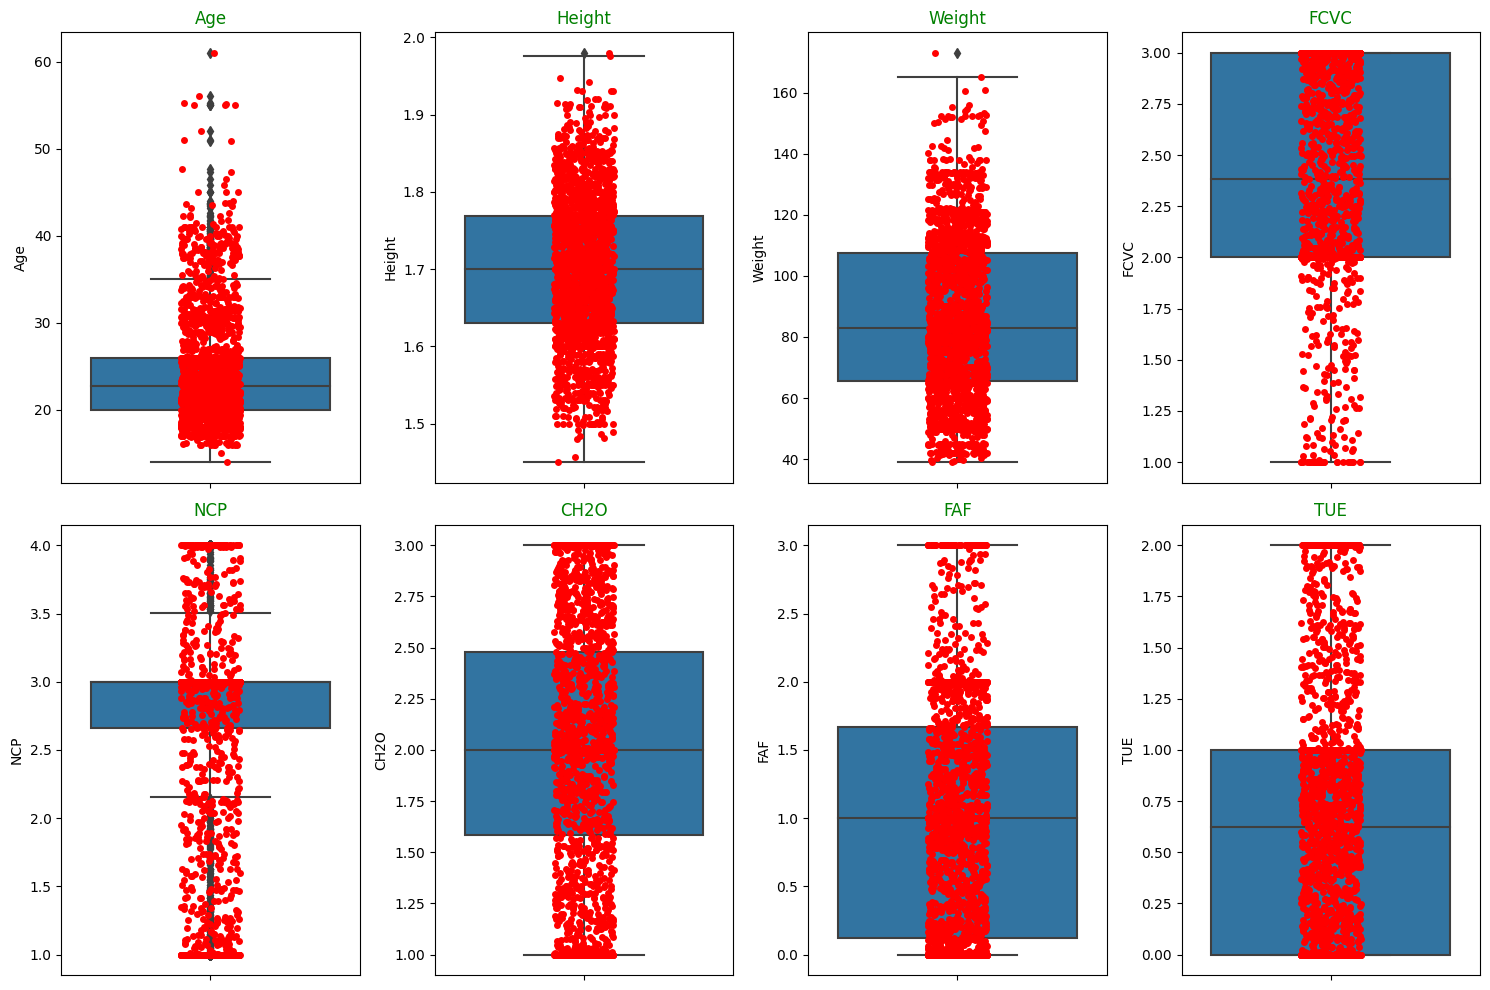

<IPython.core.display.Javascript object>

In [68]:
## Check outlier Using ( BoxPlot && StripPlot)

# Create a figure with a specified size
plt.figure(figsize=(15,10))

## Enumerate over numeric (non-object) columns in the DataFrame
for number , name in enumerate(df.select_dtypes(exclude="object").columns):
    # Create subplots in a grid format
    axs=plt.subplot(round(len(df.select_dtypes(exclude="object").columns) / 4),round(len(df.select_dtypes(exclude="object").columns) / 2),number+1)
    
    # Create a boxplot for the current numeric column
    sns.boxplot(y=df[name])
    
    # Create a stripplot for the current numeric column (points)
    sns.stripplot(data=df,y=name,color='r')
    
    # Set the title for the current subplot
    plt.title(name,color='g')
    
    # Ensure tight layout to prevent overlapping subplots
    plt.tight_layout()
    
# Show the entire plot
plt.show()

In [13]:
# Calculate number of outlier for each columns and git index of outlier
outlier_index = []
for i in df.select_dtypes(exclude="object").columns:
    if len(detect_outliers(df, 0, [i])) == 0:
        continue
    else:
        outlier_index.extend(detect_outliers(df, 0, [i]))
        print(f"Number of outlier in {i} = ", len(detect_outliers(df, 0, [i])))
        print("*" * 35)
print("Number of index outlier is ----->> ", len(set(outlier_index)))
print("Shape of data without outlier ----->> ", df.shape[0] - len(set(outlier_index)))

Number of outlier in Age =  168
***********************************
Number of outlier in Height =  1
***********************************
Number of outlier in Weight =  1
***********************************
Number of outlier in NCP =  579
***********************************
Number of index outlier is ----->>  702
Shape of data without outlier ----->>  1409


# `- Split the dataset into two parts :`
* **`1- Nature Data ( data without outlier )`**</br>
* **`2- Extreme Value Data( Include only outliers )`**</br>
# `Note_1`
**` Not recommended to drop the outlier when the values of the outlier are real values Because: `**</br>
* `1- Outliers can contain valuable information about the data or the phenomenon you are studying. They might represent rare events or extreme conditions that are crucial for your analysis.`
* `2- Removing outliers can make your analysis more sensitive to noise and fluctuations in the data. Keeping outliers can make your analysis more robust, especially if you're dealing with real-world data that may have variations and anomalies.`
* `3-  Removing outliers results in a loss of data. If you have limited data, losing even a few data points can reduce the representativeness of your dataset.`
# `Note_2`
* **`1- Create analysis on both datasets(  Extreme Value Analysis )`**</br>
* **`2- Build multiple machine learning classification models on both datasets`**

In [14]:
### Check duplicates rows
print("Number of duplicates rows is ---->> ", len(df[df.duplicated()].index))

Number of duplicates rows is ---->>  24


# `Data Variable Types:`
* **`1- Quantitative variables ( Continuous variables && Discrete variables : )`**
* **`2- Qualitative Variable ( Ordinal variables && Nominal variables )`**
**``**

In [50]:
### Countinuous 
countinuous_column=df.select_dtypes(exclude=["object"]).columns.tolist()  ## Return List


### Ordinal
ordinal_column = ['CAEC', 'CALC', 'NObeyesdad']


### Nominal
nominal_column = df.select_dtypes(include="object").iloc[:,~df.select_dtypes(include="object").columns.isin(ordinal_column)].columns.tolist()  ## Return List


print(f"Name Of Countinuous Column ----->>{countinuous_column} ")
print('*'*60)
print(f"Name Of Nominal Column ----->>{nominal_column} ")
print('*'*60)
print(f"Name Of Ordinal Column ----->>{ordinal_column} ")
print('*'*60)

Name Of Countinuous Column ----->>['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'] 
************************************************************
Name Of Nominal Column ----->>['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS'] 
************************************************************
Name Of Ordinal Column ----->>['CAEC', 'CALC', 'NObeyesdad'] 


<IPython.core.display.Javascript object>

In [5]:
pip install -U notebook-as-pdf

     ---------------------------------------- 0.0/82.9 kB ? eta -:--:--
     ---------------------------------------  81.9/82.9 kB 2.3 MB/s eta 0:00:01
     ---------------------------------------- 82.9/82.9 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/232.6 kB ? eta -:--:--
     ------------------------------------ - 225.3/232.6 kB 4.6 MB/s eta 0:00:01
     -------------------------------------- 232.6/232.6 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/101.4 kB ? eta -:--:--
     ----------------------------------- --- 92.2/101.4 kB 5.1 MB/s eta 0:00:01
     -------------------------------------- 101.4/101.4 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pyPDF2

In [7]:
pyppeteer-install 

NameError: name 'pyppeteer' is not defined